## Linear Regression with Python

Bootcamp: https://github.com/SuvroBaner/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/master/10.%20Linear-Regression/Linear%20Regression%20-%20Project%20Exercise%20.ipynb

## Data info:

- Avg. Session Length: Average session of in-store style advice sessions
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member
- Yearly amount spent: ?

In [66]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from pandas_profiling import ProfileReport


%matplotlib inline

#### Importing data

In [67]:
customers = pd.read_csv("Ecommerce_Customers.csv")

In [68]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Info e Describe methods

In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [70]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Creation of the Report with Pandas Profiling

In [71]:
profile = ProfileReport(customers)
profile.to_file("customers_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Check for missing value

Text(0.5, 1.0, 'Missing values in the dataset')

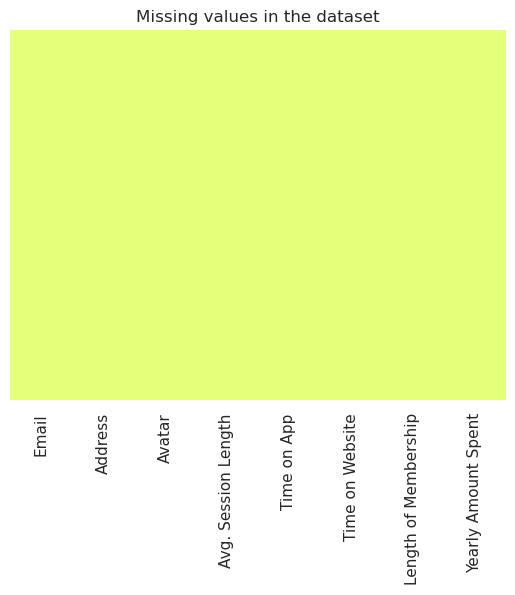

In [72]:
sns.heatmap(customers.isnull(), cbar=False, cmap="Wistia", yticklabels=False)
plt.title("Missing values in the dataset")

#### There is no missing values in the dataset

## Exploratory data analysis

#### Dropping the columns that have text only

In [73]:
columns = ["Email", "Address", "Avatar"]
customers.drop(columns, axis=1, inplace=True)


In [74]:
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


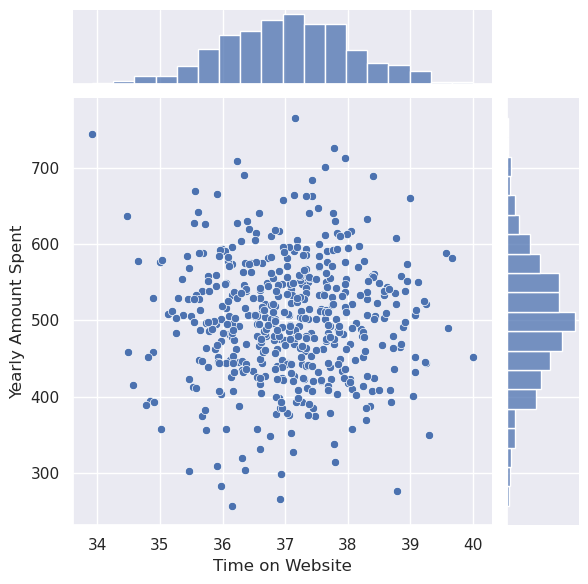

In [75]:
sns.jointplot(
    data=customers, x="Time on Website",
    y= "Yearly Amount Spent"
)

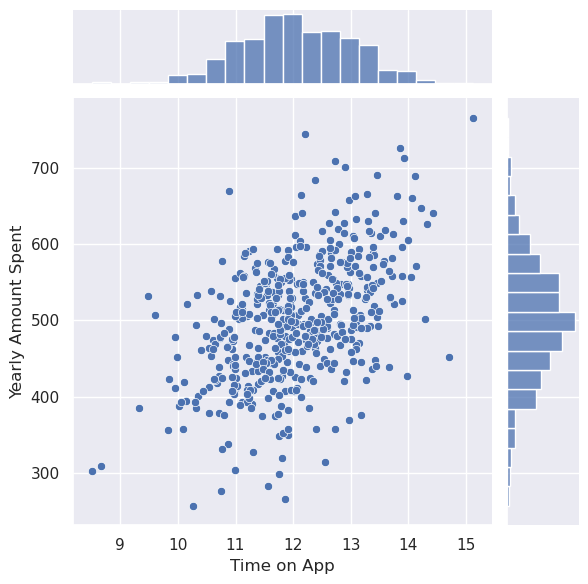

In [76]:
sns.jointplot(
    data=customers, x="Time on App",
    y= "Yearly Amount Spent"
)

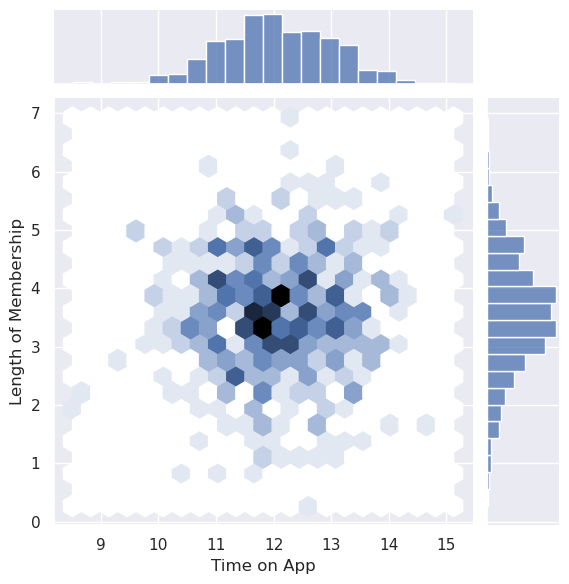

In [77]:
sns.jointplot(
    data=customers, x="Time on App",
    y= "Length of Membership", kind="hex"
)

#### Correlations

#### Pearson's correlation

<AxesSubplot:>

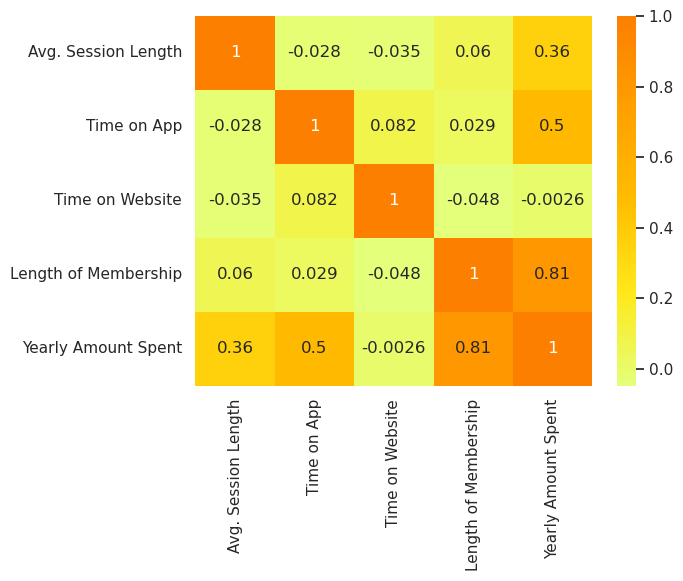

In [78]:
sns.heatmap(customers.corr(), cmap="Wistia", annot=True)

#### Spearman's correlation

<AxesSubplot:>

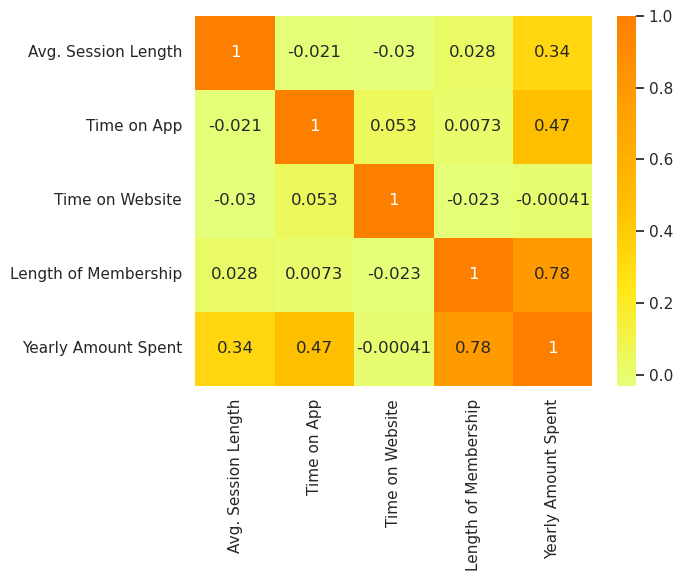

In [79]:
sns.heatmap(customers.corr(method="spearman"), cmap="Wistia", annot=True)

#### Kendall's correlation

<AxesSubplot:>

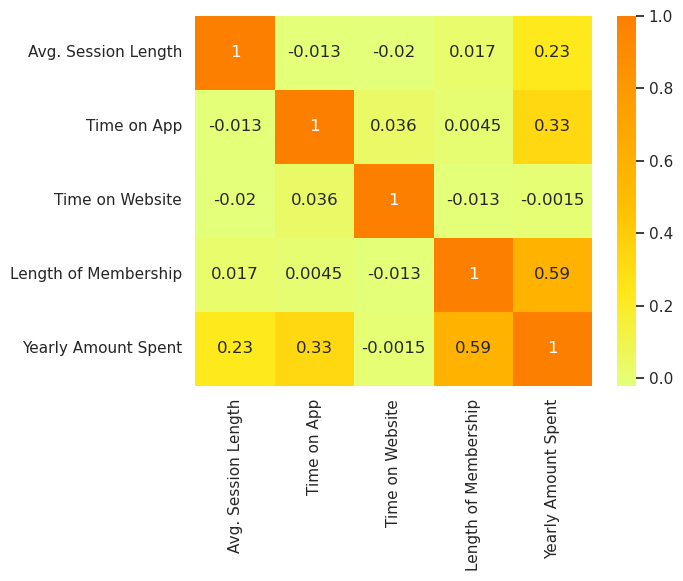

In [80]:
sns.heatmap(customers.corr(method="kendall"), cmap="Wistia", annot=True)

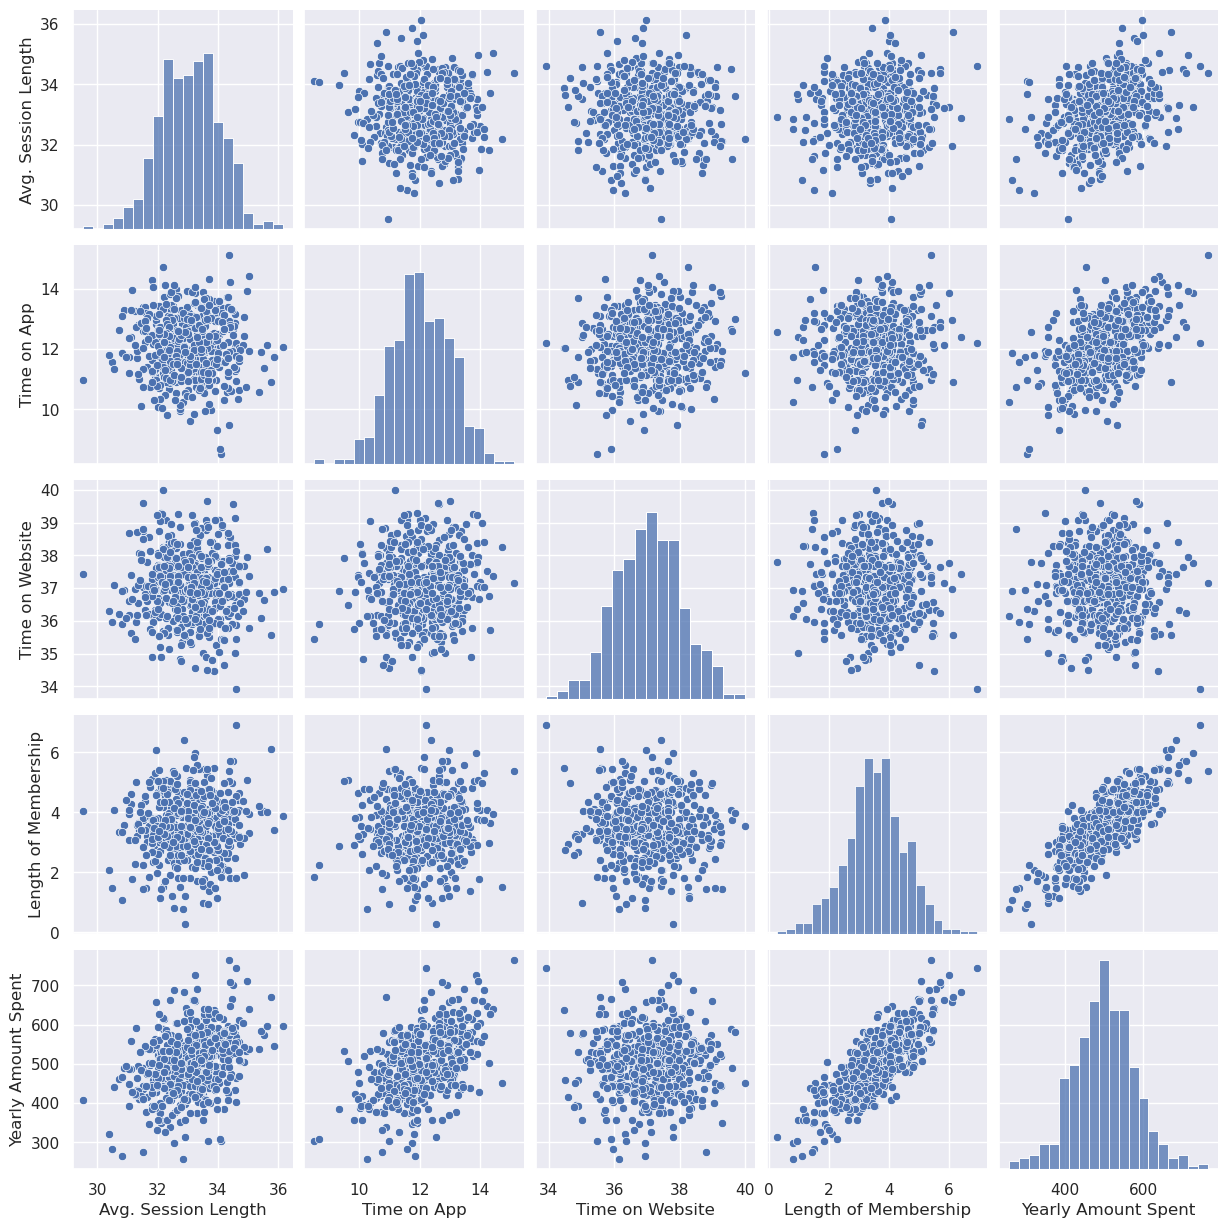

In [81]:
sns.pairplot(
    data=customers
)

#### Based on the pairplot, the "Length of Membership" looks like the feature most correlated with "Yearly Amount Spent"

#### Plotting a linear model of Yearly Amount Spent vs. Length of Membership

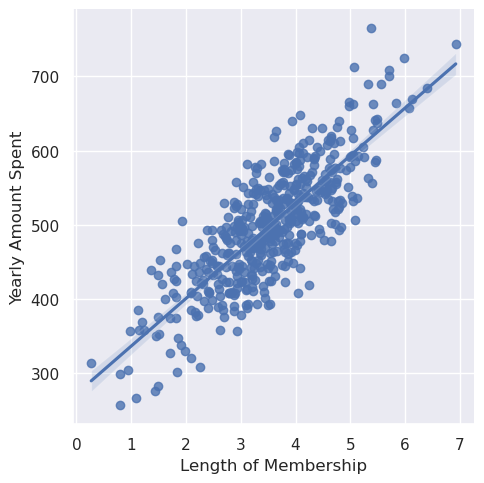

In [82]:
sns.lmplot(
    data=customers, x="Length of Membership",
    y="Yearly Amount Spent"
)

## Training and Testing Data

#### X and Y Features

In [83]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website",
"Length of Membership"]]

y = customers["Yearly Amount Spent"]

## Train-Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating and Training the Model

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

#### Checking the coefficients

In [89]:
lm.intercept_

-1047.932782250239

In [90]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficients"])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predictions from our Model

In [91]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Checking Linearity: \n Test vs Predicted Value')

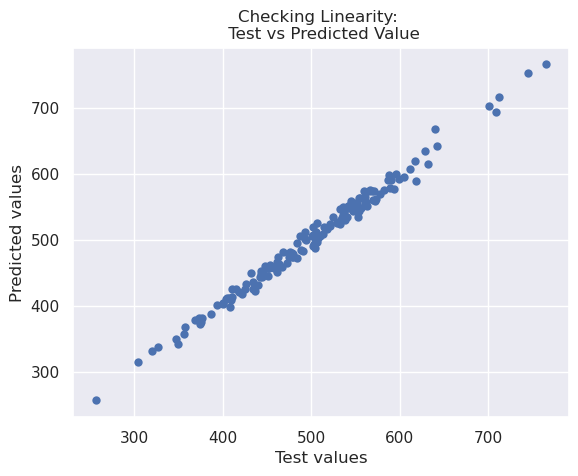

In [92]:
plt.scatter(y_test, predictions, linewidths=0)
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.title("Checking Linearity: \n Test vs Predicted Value")

#### Residual Histogram

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

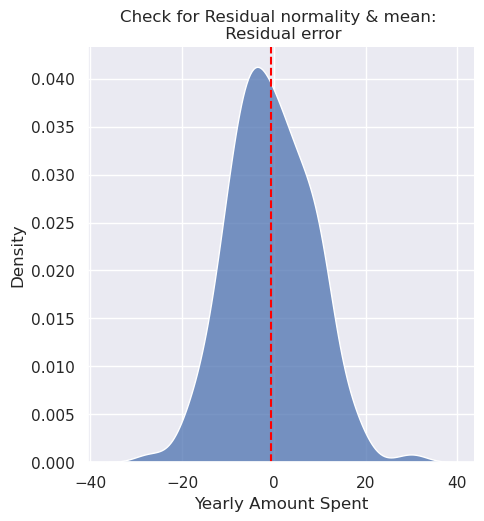

In [93]:
sns.displot((y_test-predictions), kind="kde", multiple="stack")
plt.axvline(np.mean(y_test-predictions), ls="--", color="red")
plt.title("Check for Residual normality & mean: \n Residual error")

## Regression Evaluation Metrics

In [94]:
from sklearn import metrics

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637
R2_Score: 0.9890046246741234
